In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [17]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)


# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)




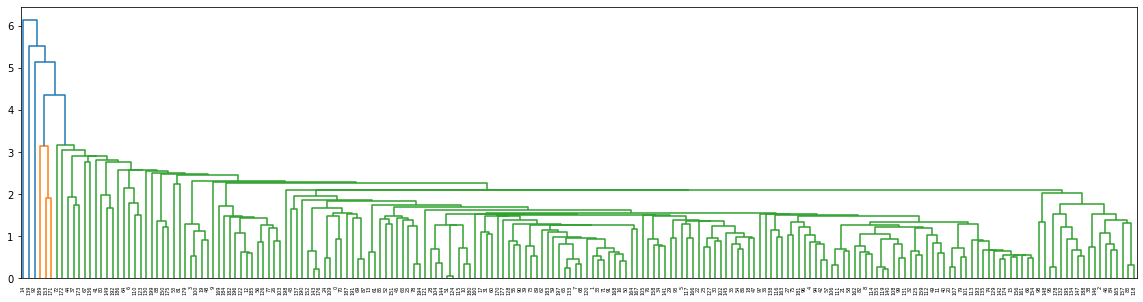

In [5]:

# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()



In [12]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

1    200
dtype: int64

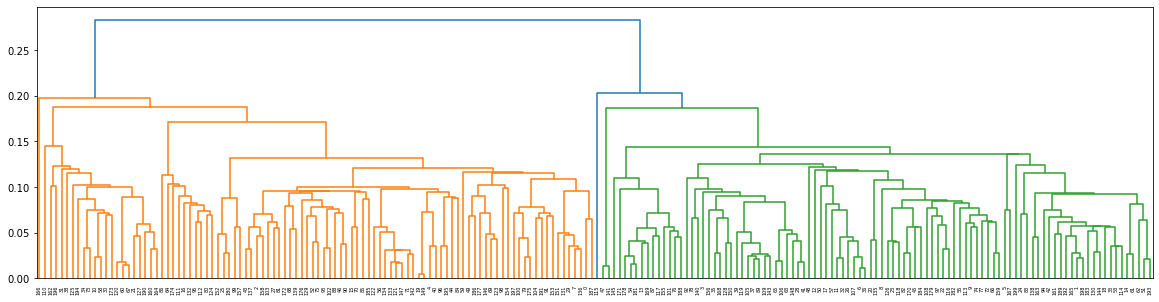

In [18]:


# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()



In [10]:


# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()



1    100
2    100
dtype: int64

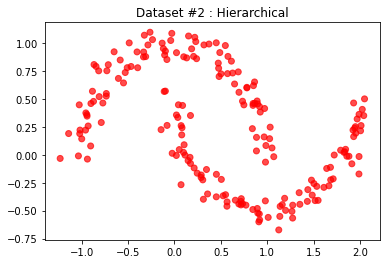

In [19]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

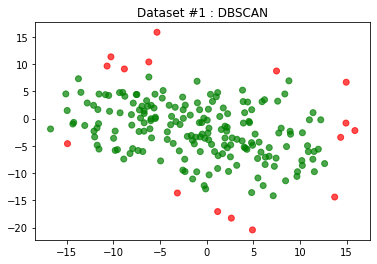

In [20]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

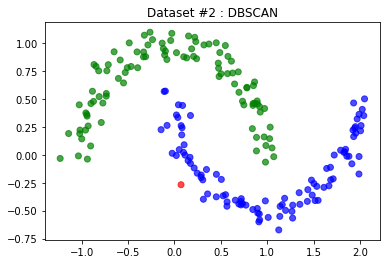

In [25]:


# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()


# Exercise 4


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [15]:


# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='Blues')
    plt.show()



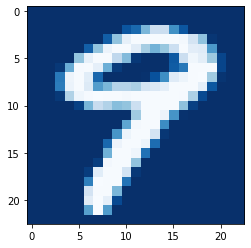

In [16]:
X = np.array(df)
ShowMe(X)

In [17]:
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC)                           # Define a PCA object for a given number of target PCs. 
    X_pca = pca.fit_transform(X)                            # Get the transformed scores.
    return pca.inverse_transform(X_pca) 

N# of PCs = 23


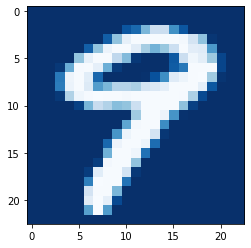

N# of PCs = 10


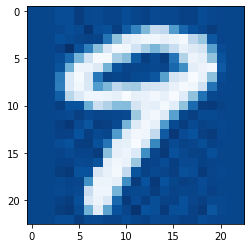

N# of PCs = 5


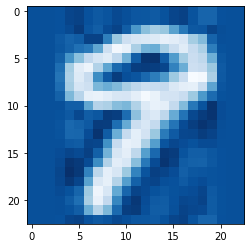

N# of PCs = 3


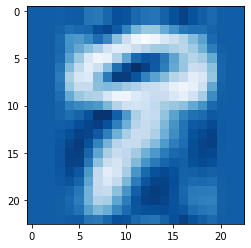

N# of PCs = 1


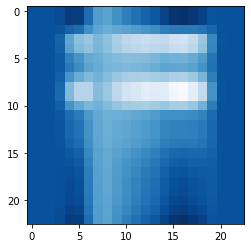

In [18]:
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

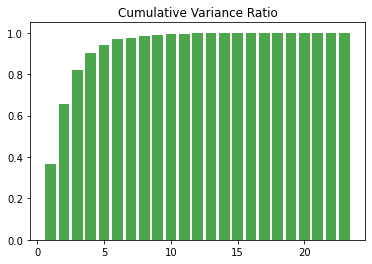

In [19]:
pca = PCA(n_components = 23)                          # Define a PCA object.
pca.fit(X)                                            # Train with the data.

# Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_)        # Calculate the CVRs.
nPCs = np.arange(23)+1                                 # Define an array that corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()



In [20]:
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5, random_state=123)
X.shape

(150, 8)

In [21]:


# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])



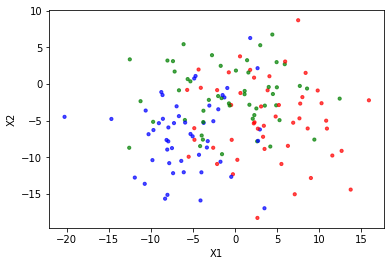

In [22]:
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

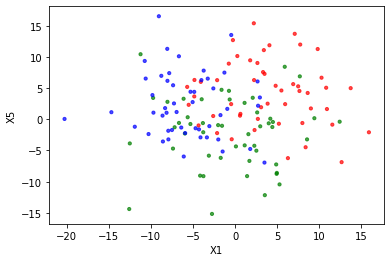

In [23]:
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

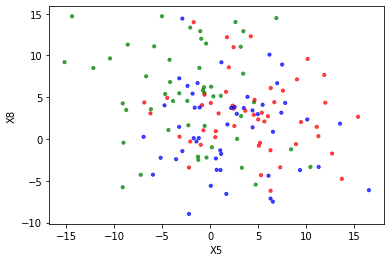

In [24]:
plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

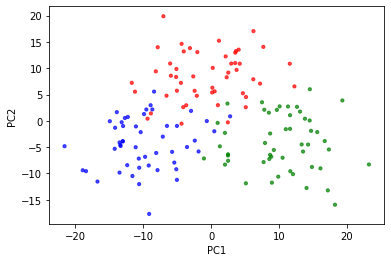

In [25]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [26]:
df = pd.read_csv('data_galton.csv', header='infer')

df.head()

# There are many repeated values.
# So, we summarize as a cross table.
myTable = pd.crosstab(df.parent,df.child)
myTable

# Transform the cross table so that it could be displyed as a Scatter plot. 
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])



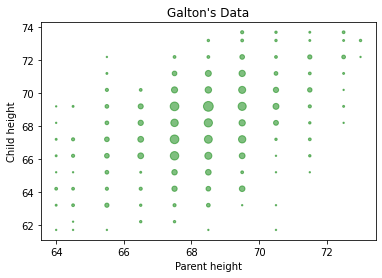

In [27]:
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

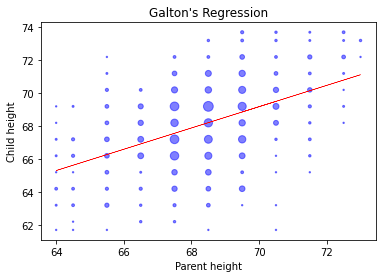

In [30]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

# Train.
lm.fit(df[['parent']],df[['child']])

# Show the intercept.
lm.intercept_

# Show the slope.
lm.coef_



# Predicted Y.
predY = lm.predict(df[['parent']])

# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

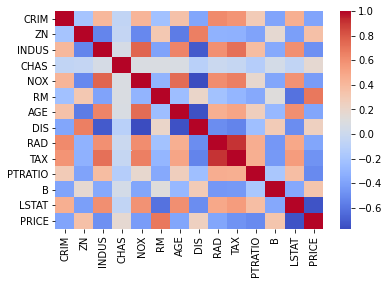

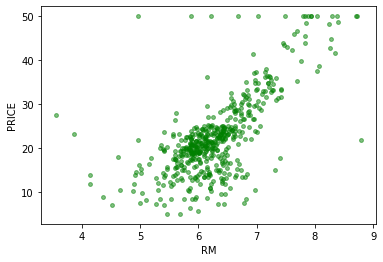

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
%matplotlib inline



data = load_boston()

# Display the dictionary keys.
data.keys()

# Display the description on the data.
print(data['DESCR'])

# The explanatory variables.
X = data['data']
header = data['feature_names']

# The response variable.
Y = data['target']
Y = Y.reshape(-1, 1)



df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

df.head(5)

df.tail(5)

# Descriptive statistics of the variables (columns).
df.describe()

# Pair-wise correlation matrix.
np.round(df.corr(),2)

# Visualize the correlation matrix.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

# Visualize RM vs PRICE.
plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()



# Train.
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

# The intercept.
lm.intercept_

# The rest of coefficients (parameters).
lm.coef_

# Display the parameters as a DataFrame.
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF



In [34]:
# Split the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# predY_in = in-sample prediction of Y.
# predY_out = out-of-sample prediction of Y.
lm = LinearRegression()
lm.fit(X_train,Y_train)
predY_in = lm.predict(X_train)
predY_out = lm.predict(X_test)

print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))



(354, 13)
(152, 13)
(354, 1)
(152, 1)
In-sample MSE is      : 20.184336639873155
Out-of-sample MSE is  : 28.40585481050824
--------------------------------------------------
In-sample RMSE is     : 4.492698146979514
Out-of-sample RMSE is : 5.329714327288869
